# Plot noise matrix calculated as pulse-template (COVARM colum)

# Imports and definitions

In [1]:
import os
import tempfile
import shlex

from subprocess import check_call, STDOUT

from astropy.io import fits
from astropy.table import Table

import matplotlib.pyplot as plt
import numpy as np

import math

#from IPython import get_ipython
#get_ipython().run_line_magic('matplotlib', 'notebook')
#%matplotlib notebook

#import ipywidgets as widgets
#%matplotlib widget

#%matplotlib inline

#%matplotlib ipympl

'''import errno
import sys
import shutil
import fnmatch

from datetime import datetime
from pathlib import Path

from astropy.io import ascii
from astropy import units as u
from astropy.visualization import quantity_support


import pandas

import numpy.polynomial.polynomial as poly


from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.transforms as transforms
from matplotlib.gridspec import GridSpec

#import heasoftpy as hsp
from RxLines import allcomplexes
from RxLines import ScKa1_cmass, ScKa2_cmass, ScKb_cmass, VKa1_cmass, VKa2_cmass, VKb_cmass 
from RxLines import NiKa1_cmass, NiKa2_cmass, NiKb_cmass, ZnKa1_cmass,ZnKa2_cmass,ZnKb_cmass
from RxLines import GeKa1_cmass, GeKa2_cmass, GeKb_cmass, CoKb_cmass, FeKb_cmass

from getMaximaDensity import getMaximaDensity
from fit3gauss2hist import fit3gauss2hist
from gainScaleFit import gainScalePolyFit
from fitVoigt2hist_err import fitVoigt2hist_err
from fitVoigt2hist_err_noties import fitVoigt2hist_err_noties
from fit_nvoigt_complex import fit_nvoigt_complex, plot_hist_nvoigt
from commands import run_comm
from clean_records import remove_invalid_records, remove_XT_from_DF, get_multipulse_records
from annote import AnnoteFinder
from correct_signal import correct_signal
from correct_signal_unbiased import correct_signal_unbiased
from idlines_cross import idlines_cross
from idlines_cross_LargeT import idlines_cross_LargeT
from compute_bsln_blocks import compute_bsln_blocks, smooth_data_in_blocks
from fwhm import expected_std

from numina.array.wavecalib.crosscorrelation import periodic_corr1d
plt.rcParams.update({'font.size': 14})
quantity_support()'''

cwd = os.getcwd()
tmpDir = tempfile.mkdtemp()
os.environ["PFILES"] = tmpDir + ":" + os.environ["PFILES"]
os.environ["HEADASNOQUERY"] = ""
os.environ["HEADASPROMPT"] = "/dev/null/"

In [20]:
#libraryRoot = "library_prueba_COVARM1"
#libraryFile = libraryRoot + ".fits"

#libraryRoot = "library1keV_PL4096_20000p"
#libraryFile = "/dataj6SIRENA/ceballos/INSTRUMEN/EURECA/testHarness/simulations/SIXTE/LIBRARIES/tessimLPA2shunt_oldnoise/GLOBAL/ADC/noMatNoise/" + libraryRoot + ".fits"

libraryRoot = "library_COVARM_20000p_512"
libraryFile = "/dataj6SIRENA/cobo/prueba/" + libraryRoot + ".fits"

# Read COVARM column

512
259.7142535303167
-4.1023981623605374


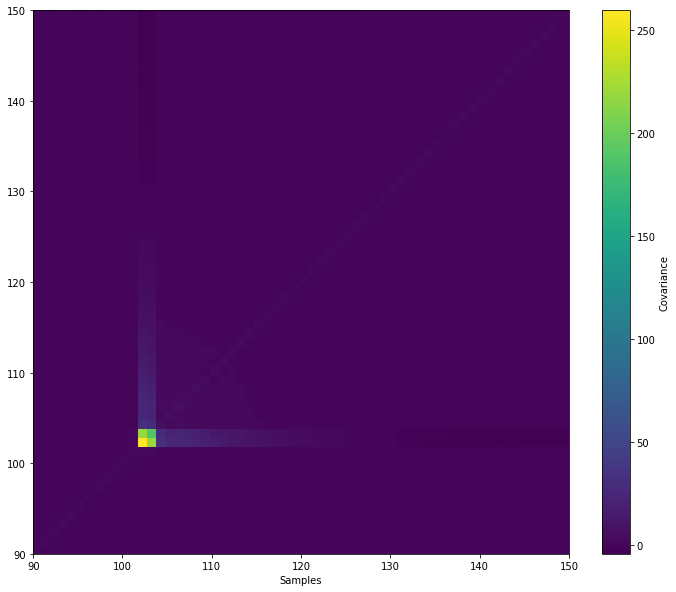

In [21]:
file = fits.open(libraryFile, memmap=True)
fileTab = file['LIBRARY'].data
vectorCOVARM = fileTab['COVARM'] # COVARM is a column which stores covariance matrix nxn as a vector with nxn size
sizeCOVARM = int(math.sqrt(vectorCOVARM[0].size))
print(sizeCOVARM)
file.close()

# Vector conversion into a matrix nxn
matrixCOVARM = vectorCOVARM.reshape((sizeCOVARM, sizeCOVARM))
print(np.max(matrixCOVARM))
print(np.min(matrixCOVARM))
#for i, fila in enumerate(matrixCOVARM):
#    if i==0:
#        print(f"Fila {i + 1}: {fila}")

# Plot
fig = plt.figure(figsize=(12, 10))
plt.imshow((matrixCOVARM), extent=[1, sizeCOVARM, 1, sizeCOVARM], origin='lower', cmap='viridis')  
#plt.imshow(np.log10(matrixCOVARM), extent=[1, sizeCOVARM, 1, sizeCOVARM], origin='lower', cmap='viridis')  
#plt.imshow(matrixCOVARM, extent=[1, sizeCOVARM, 1, sizeCOVARM], origin='lower', cmap='viridis', aspect='auto')  
plt.colorbar(label='Covariance')  # Add colour bar as a reference
plt.xlabel('Samples')
plt.xlabel('Samples')

# Define el rango de zoom que quieres en la diagonal (ejemplo: de 100 a 150 en ambos ejes)
start_zoom = 90
end_zoom = 150
# Ajusta los límites de los ejes para hacer zoom en esa parte de la diagonal
plt.xlim(start_zoom, end_zoom)
plt.ylim(start_zoom, end_zoom)

#plt.title('Covariance2D(' + str(sizeCOVARM) + ',preBuffer=y)')
# Zoom available
plt.gca().set_aspect('auto') 
plt.show()

'''fila = matrixCOVARM[0, :]
plt.plot(fila, marker='o', linestyle='-', color='b')  
plt.xlabel('Samples')
plt.ylabel('covariance')
plt.show()'''

fig.savefig(libraryRoot + '.png', dpi=fig.dpi)

